# Costs

In [1]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local imports
from utils import get_data
from utils import tech_order, tech_colors
from utils import get_data_sftp
from datetime import datetime
from pytz import timezone

plt.style.use("style.txt")
pd.options.display.float_format = '{:,.2f}'.format

### Load files

In [2]:
hostname="shasta-db1.ream.ucsd.edu"
username="n7gonzalez"
data_path_remote="/home/n7gonzalez/switch/"
scenario_name = ["PRM_20", "PRM_20_renewables_only"]
savefig = False
folder_to_save_results=""

In [3]:
fname = "costs_itemized.csv"
costs= get_data_sftp(hostname, username, scenario_name, fname)
costs

,PERIOD,Component,Component_type,AnnualCost_NPV,AnnualCost_Real,scenario
0,2050,TotalGenFixedCosts,annual,"118,310,000,000.00","60,064,000,000.00",PRM_20
1,2050,StorageEnergyFixedCost,annual,"42,280,000,000.00","21,464,000,000.00",PRM_20
2,2050,FuelCostsPerPeriod,annual,"1,530,300,000.00","776,910,000.00",PRM_20
3,2050,TxFixedCosts,annual,"6,981,200,000.00","3,544,200,000.00",PRM_20
4,2050,EmissionsCosts,annual,0.00,0.00,PRM_20
5,2050,GenVariableOMCostsInTP,timepoint,"395,580,000.00","200,830,000.00",PRM_20
0,2050,TotalGenFixedCosts,annual,"117,810,000,000.00","59,807,000,000.00",PRM_20_renewables_only
1,2050,StorageEnergyFixedCost,annual,"42,805,000,000.00","21,731,000,000.00",PRM_20_renewables_only
2,2050,FuelCostsPerPeriod,annual,"1,523,100,000.00","773,220,000.00",PRM_20_renewables_only
3,2050,TxFixedCosts,annual,"8,132,000,000.00","4,128,400,000.00",PRM_20_renewables_only


## Costs (NPV)

### Data transformations

In [4]:
costsNPV_by_scenario = costs.pivot_table(
    index="scenario", columns="Component", values="AnnualCost_NPV", aggfunc=np.sum
)
costsNPV_by_scenario.reindex(columns=["TotalGenFixedCosts", "StorageEnergyFixedCost", "FuelCostsPerPeriod", "TxFixedCosts",
                          "EmissionsCosts", "GenVariableOMCostsInTP"])

costsNPV_by_scenario['indexNumber']=[scenario_name.index(costsNPV_by_scenario.index[i]) for i in range(0,len(scenario_name))]
costsNPV_by_scenario.sort_values(['indexNumber'], ascending = [True], inplace = True)
del costsNPV_by_scenario['indexNumber']
costsNPV_by_scenario

costsNPV_by_scenario['Total']=[costsNPV_by_scenario.sum(axis=1)[i] for i in range(0,len(scenario_name))]


In [5]:
s = costsNPV_by_scenario.select_dtypes(include=[np.number])*1E-9
costsNPV_by_scenario[s.columns] = s
costsNPV_by_scenario

Component,EmissionsCosts,FuelCostsPerPeriod,GenVariableOMCostsInTP,StorageEnergyFixedCost,TotalGenFixedCosts,TxFixedCosts,Total
scenario,,,,,,,
PRM_20,0.00,1.53,0.40,42.28,118.31,6.98,169.50
PRM_20_renewables_only,0.00,1.52,0.39,42.80,117.81,8.13,170.66


In [6]:
costsNPV_by_scenario = costsNPV_by_scenario.rename({
        "GenVariableOMCostsInTP": "Var OM Gen Costs",
        "FuelCostsPerPeriod": "Fuel Costs",
        "StorageEnergyFixedCost": "StorageFixed Costs",
        "TotalGenFixedCosts": "Gen Fixed Costs",
        "TxFixedCosts": "Tx Fixed Costs"
    }, axis=1)

cost_types=["Var OM Gen Costs", 
        "Fuel Costs",
        "StorageFixed Costs",
        "Gen Fixed Costs",
        "Tx Fixed Costs"]
del costsNPV_by_scenario['EmissionsCosts']
costsNPV_by_scenario

Component,Fuel Costs,Var OM Gen Costs,StorageFixed Costs,Gen Fixed Costs,Tx Fixed Costs,Total
scenario,,,,,,
PRM_20,1.53,0.40,42.28,118.31,6.98,169.50
PRM_20_renewables_only,1.52,0.39,42.80,117.81,8.13,170.66


/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_3434/319442383.py:44: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.T.to_latex(folder_to_save_results+"Costs (Billion USD) NPV.tex",index=True,


Component,Fuel Costs,Var OM Gen Costs,StorageFixed Costs,Gen Fixed Costs,Tx Fixed Costs,Total
scenario,,,,,,
PRM_20,1.53,0.40,42.28,118.31,6.98,169.50
PRM_20_renewables_only,1.52,0.39,42.80,117.81,8.13,170.66


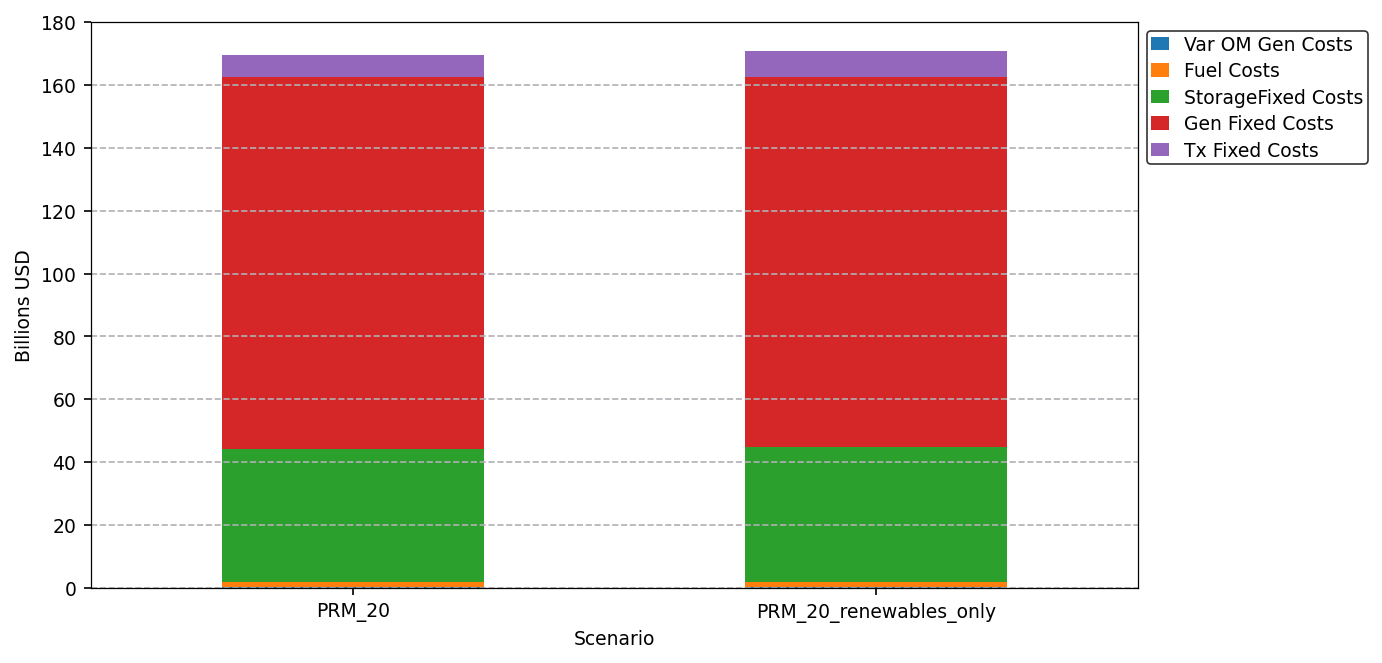

In [7]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(9,5), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = costsNPV_by_scenario[cost_types].plot.bar(stacked=True,ax=ax, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Billions USD", fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Costs (Billion USD) NPV.png", transparent=False)

#Rename for spaces purposes
data=costsNPV_by_scenario.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
data.T.to_latex(folder_to_save_results+"Costs (Billion USD) NPV.tex",index=True,
                                  float_format='%.2f',
                                  caption="Costs (Billion USD) NPV")

#Show dataframe
costsNPV_by_scenario

## Costs (REAL)

In [8]:
costsReal_by_scenario = costs.pivot_table(
    index="scenario", columns="Component", values="AnnualCost_Real", aggfunc=np.sum
)
costsReal_by_scenario.reindex(columns=["TotalGenFixedCosts", "StorageEnergyFixedCost", "FuelCostsPerPeriod", "TxFixedCosts",
                          "EmissionsCosts", "GenVariableOMCostsInTP"])

costsReal_by_scenario['indexNumber']=[scenario_name.index(costsReal_by_scenario.index[i]) for i in range(0,len(scenario_name))]
costsReal_by_scenario.sort_values(['indexNumber'], ascending = [True], inplace = True)
del costsReal_by_scenario['indexNumber']
costsReal_by_scenario

costsReal_by_scenario['Total']=[costsReal_by_scenario.sum(axis=1)[i] for i in range(0,len(scenario_name))]

In [9]:
s = costsReal_by_scenario.select_dtypes(include=[np.number])*1E-9
costsReal_by_scenario[s.columns] = s
costsReal_by_scenario

Component,EmissionsCosts,FuelCostsPerPeriod,GenVariableOMCostsInTP,StorageEnergyFixedCost,TotalGenFixedCosts,TxFixedCosts,Total
scenario,,,,,,,
PRM_20,0.00,0.78,0.20,21.46,60.06,3.54,86.05
PRM_20_renewables_only,0.00,0.77,0.20,21.73,59.81,4.13,86.64


In [10]:
costsReal_by_scenario = costsReal_by_scenario.rename({
        "GenVariableOMCostsInTP": "Var OM Gen Costs",
        "FuelCostsPerPeriod": "Fuel Costs",
        "StorageEnergyFixedCost": "StorageFixed Costs",
        "TotalGenFixedCosts": "Gen Fixed Costs",
        "TxFixedCosts": "Tx Fixed Costs"
    }, axis=1)

cost_types=["Var OM Gen Costs", 
        "Fuel Costs",
        "StorageFixed Costs",
        "Gen Fixed Costs",
        "Tx Fixed Costs"]
del costsReal_by_scenario['EmissionsCosts']
costsReal_by_scenario

Component,Fuel Costs,Var OM Gen Costs,StorageFixed Costs,Gen Fixed Costs,Tx Fixed Costs,Total
scenario,,,,,,
PRM_20,0.78,0.20,21.46,60.06,3.54,86.05
PRM_20_renewables_only,0.77,0.20,21.73,59.81,4.13,86.64


/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_3434/3307743802.py:44: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data.T.to_latex(folder_to_save_results+"Real Costs (Billion USD).tex",index=True,


Component,Fuel Costs,Var OM Gen Costs,StorageFixed Costs,Gen Fixed Costs,Tx Fixed Costs,Total
scenario,,,,,,
PRM_20,0.78,0.20,21.46,60.06,3.54,86.05
PRM_20_renewables_only,0.77,0.20,21.73,59.81,4.13,86.64


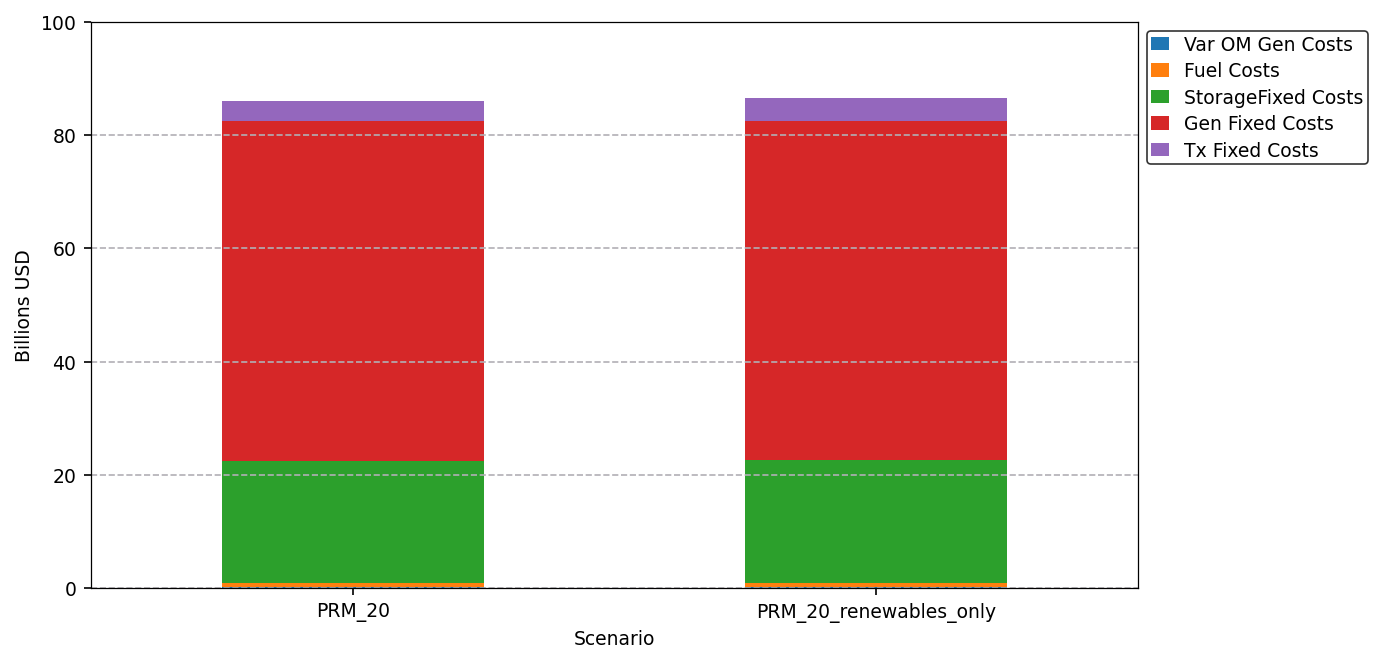

In [11]:
# Initialize figure environment
fig, ax = plt.subplots(figsize=(9,5), dpi=150)

#Set background of the graph
fig.patch.set_facecolor('white')

# Main plot
ax = costsReal_by_scenario[cost_types].plot.bar(stacked=True,ax=ax, rot=0, lw=0)

# Label configuration
plt.xlabel("Scenario", fontsize=9)
plt.ylabel("Billions USD", fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)

# Legend configuration
ax.legend(
    #handles[::-1],
    # labels[::-1],
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=9,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)

#Axis configuration
ax.grid(axis='y', linestyle='dashed')

#Set background of the graph
ax.patch.set_facecolor('white')

plt.savefig(folder_to_save_results+"Real costs (Billion USD).png", transparent=False)

#Rename for spaces purposes
data=costsReal_by_scenario.rename(index={"Baseline":"Base",
                                       "Period_rate_90":"Period_90",
                                       "Period_rate_100":"Period_100",
                                       "Timepoint_rate_100":"Tp_100",
                                       "Zero_tx_expansion": "ZeroTxExp",
                                       "Zero_tx_capacity": "ZeroTxCap"},inplace=False)
data.T.to_latex(folder_to_save_results+"Real Costs (Billion USD).tex",index=True,
                                  float_format='%.2f',
                                  caption="Real Costs (Billion USD)")

#Show dataframe
costsReal_by_scenario